In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.text import *

In [21]:
!wget http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz

--2018-11-18 04:47:44--  http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.20
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.20|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3127238 (3.0M) [application/x-gzip]
Saving to: ‘review_polarity.tar.gz’

review_polarity.tar 100%[===================>]   2.98M  1.66MB/s    in 1.8s    

2018-11-18 04:47:46 (1.66 MB/s) - ‘review_polarity.tar.gz’ saved [3127238/3127238]



In [22]:
!mkdir data/imdb2

In [24]:
path = Path('data/imdb2/txt_sentoken/')

In [25]:
path.ls()

[PosixPath('data/imdb2/txt_sentoken/pos'),
 PosixPath('data/imdb2/txt_sentoken/neg')]

In [26]:
data_lm = (TextFileList.from_folder(path)
          .label_const(0)
          .random_split_by_pct(0.2)
          .datasets()
          .tokenize()
          .numericalize()
          .databunch(TextLMDataBunch))

In [36]:
data_lm.save('tmp_lm')

In [37]:
data_lm.show_batch()

idx,text
0,"xxfld 1 unfortunately it does n't get much more formulaic than one tough cop . \n there 's the renegade cop with the loser partner who has to many problems to explain . \n the renegade has to prove his good name and is trapped between the good guys , the bad guys and some woman who really has nothing to do with the story other than being there for the purpose of providing sex for the hero in the middle of the film . \n bo xxunk ( pronounced xxunk , baldwin ) is"
1,"a bunch of flat lies . \n it came as no surprise to me to learn that huntingburg , indiana ( where the film is set ) , does not have a mcdonald 's , a xxunk store , a statue of a man on a horse , nor even a dam close by . \n even if you can ignore these somewhat xxunk lies ( even though the dam is crucial to hard xxunk plot ) ; there is still a bunch of things that just dont gel . \n firstly , morgan freeman"
2,", it had the big battle scene at the end , but the only excitement felt was that the movie might be nearing a conclusion . \n never too soon , the movie did conclude in a very simple , disappointing way . \n even though it 's one of the shorter movies i 've seen this year , it 's one that i would definitely not want to subject myself to sitting thru again . \n like i said , the special effects are the only reason that this film should have any sense"
3,"the pivotal role of kaisa . \n if lena headey were a stronger actress , perhaps aberdeen could have been able to coast on the performances and moody , haunting cinematography ( rendering norway into its own xxunk ghost world -- the reference to a certain superior american indie flick intentional ) . \n headey 's too busy acting , using her face and xxunk brow to convey every last xxunk of xxunk . \n if she were paying any attention to skarsg ? rd , maybe she 'd figure out that doing less can"
4,"paul xxunk ) , brings them through some of the creepier parts of the former asylum . \n but , a job is a job and , if they finish in a week , as promised , there is a $ 1 xxrep 4 0 bonus in store . \n as they get down to their work , things , normal and not so normal , begin to happen . \n gordon hears a xxunk voice xxunk him . \n phil ( david caruso ) is conflicted working with a guy , hank ( josh"
5,"lord could not live up to the kind of buzz ( which is far too weak a word ) that star wars xxunk i : the phantom menace so effortlessly generated . \n but that does not mean that the film itself is bad . \n in fact , it is terrific . \n i strongly suspect that many of the people who were xxunk by it have simply xxunk to the media machine and the inevitable backlash . \n it is set some decades before the events of the original 1977 star wars took"
6,"can envision the board of xxunk , licking their chops at this coup and counting the days until their goal of "" a film by "" is attained . ) \n and , much like mr . tarantino 's screenwriting , mr . williamson 's work is vaguely unconventional , incorporating both contemporary pop culture references and allusions to other films into the dialogue of his characters . \n in scream , they xxunk discussed other horror films ; here in the sequel , the characters discuss the relative merits of film sequels . \n"
7,"his pants . \n the dialogue consists of nothing but one - liners , and consequently the attempts at character development are embarrassing . \n it 's a shame because with a xxunk screenplay , russell and stallone could have turned tango & cash into a charming "" lethal xxunk "" adventure . \n tango & cash tries to maintain a light tone , and you do laugh about once every five minutes . \n seeing russell in drag is the movie 's funniest moment , but you probably already have seen it in the"
8,he was on letterman not too long ago ) . \n but the guy makes worse films than reagan did . \n so what 's the plot of this shit - xxunk ? \n well . . . something \n about him trying to catch a stupid - ass crook ( william forsythe ) who shot and killed his partner in bro

In [38]:
learn = language_model_learner(data_lm, drop_mult=0.3, pretrained_model=URLs.WT103)

In [39]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


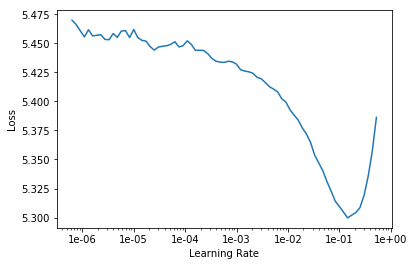

In [42]:
learn.recorder.plot(skip_end=15)

In [43]:
lr = 2e-2

In [44]:
learn.fit_one_cycle(1, lr, moms=(0.8, 0.7))

Total time: 00:37
epoch  train_loss  valid_loss  accuracy
1      4.562715    4.269391    0.281617  (00:37)



In [45]:
learn.save('fit_head')

In [ ]:
learn.load('fit_head')

In [46]:
learn.unfreeze()

In [47]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8, 0.7))

Total time: 07:26
epoch  train_loss  valid_loss  accuracy
1      4.169057    4.190747    0.289064  (00:44)
2      4.067305    4.131121    0.295619  (00:44)
3      3.974399    4.092180    0.299714  (00:44)
4      3.889253    4.057860    0.303651  (00:44)
5      3.750151    4.042715    0.305062  (00:44)
6      3.646851    4.038868    0.305813  (00:44)
7      3.567274    4.039391    0.306587  (00:45)
8      3.504038    4.046198    0.306422  (00:44)
9      3.423318    4.053157    0.306132  (00:44)
10     3.404336    4.054321    0.306056  (00:44)



In [48]:
learn.save('fine_tuned')

In [ ]:
learn.load('fine_tuned')

In [49]:
learn.save_encoder('fine_tuned_enc')

In [50]:
data = (TextFileList.from_folder(path)
       .label_from_folder(classes=['neg', 'pos'])
       .random_split_by_pct(0.2)
       .datasets()
       .tokenize()
       .numericalize(vocab=data_lm.vocab)
       .databunch(TextDataBunch, bs=50))

data.save('tmp_class')

In [52]:
data_clas = TextClasDataBunch.load(path, 'tmp_class', bs=50)

In [53]:
data_clas.show_batch()

text,label
"xxfld 1 note : some may consider portions of the following text to be spoilers . \n be forewarned . \n like its own opening shot , from out of the darkness boogie nights xxunk explodes upon the film scene with stunning authority and clarity , xxunk xxunk its helmer paul thomas anderson as a xxunk major talent . \n a sprawling epic set in the heart of the disco era and focused upon the xxunk and decline of a troupe in the adult film industry , boogie nights is an astonishingly ambitious feature film which is completely effective both",pos
"xxfld 1 "" say , any of you know how to madison ? "" \n --- brad "" asshole "" majors ( barry xxunk ) shows just how xxunk he is after watching the kooky xxunk wrap up their ode to the time xxunk in the cult classic the rocky horror picture show . \n the story behind the rocky horror picture show is one of legend . \n in the early 70 's , stage actor turned first - time playwright richard xxunk decided he wanted to make a musical homage to the crazy b - movies he had",pos
"xxfld 1 i remember seeing the trailer of the black cauldron on the pinocchio video . \n it really scared me , and i did n't want to go see it . \n however , after i heard about how wonderful it was , i wanted to see it . \n i did n't get a chance to do so , until now . \n the film , disney 's 25th animated feature , opens with a menacing shot of a great black cauldron xxunk by mist as a narrator begins to tell the tale : a long time ago",pos
"xxfld 1 natural born killers is really a very simple story that , in essence , has already been told in bonnie & clyde with some major variations in emphasis , mood and degree . \n both films xxunk "" outlaws , "" in one case bank robbers and killers and in the other mass murderers . \n both relate the story of a couple liberated by love . \n but where bonnie & clyde was partial and subtle , natural born killers is total and blatant . \n where bonnie & clyde was social , natural born killers is",pos
"xxfld 1 * * * the following review contains spoilers * * * \n "" it 's just . . . \n the way . . . \n we are . "" \n --- a rapist ( matt xxunk ) responds to supergirl 's ( helen slater ) xxunk as to why she 's being attacked , an example of the mind - numbingly bad dialogue in supergirl . \n i 'll admit it . . . \n i love superman iii . \n i know it 's hated amongst the superman faithful who dismiss it as nothing more than",neg
"xxfld 1 the above is dialogue from this film , taken almost completely in context , and not xxunk up a bit to make it more inept than it is . \n it is spoken between two of the protagonists somewhere in the film , and basically serves as a perfect example of what this film is about , especially if you realize that this exchange is meant to be taken seriously . \n mr . gregg "" i'm - having - a - mid - life - crisis "" araki , the writer and director of this film ,",neg
"xxfld 1 most people fit into two different categories : you either love woody allen , or you hate his guts . \n my family , for the most part , hates him and his movies . \n i think he 's very funny , but his shtick has gotten forced and contrived over the years . \n so maybe taking his body away was the best decision any producer could have thought of . \n unrestrained by physical boundaries , allen 's humor comes shining through . \n those who had problems with his physical appearance will be able",pos
"xxfld 1 star wars : episode 1 - the phantom menace ( 1999 ) \n review by matt xxunk \n few movies evoke nostalgia , enthusiasm , and affection like george lucas ' 1977 classic , star wars . \n the original blockbuster film and its two sequels not only evoked wonder and passion in a generation of filmgoers , but has deeply entrenched itself in american pop culture . \n arguably , more americans today can explain what "" the force "" or a "" jedi "" is than a budget deficit or a xxunk . \n so 22",pos
"xxfld 1 warning : spoilers are included in this review . . . \n but it does n't really m

In [54]:
learn = text_classifier_learner(data_clas, drop_mult=0.5)

In [55]:
learn.load_encoder('fine_tuned_enc')

In [56]:
learn.freeze()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


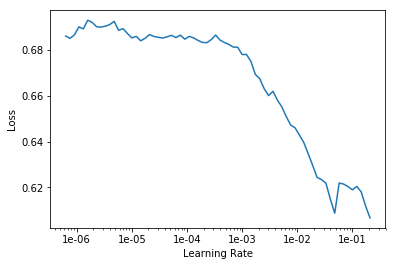

In [57]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

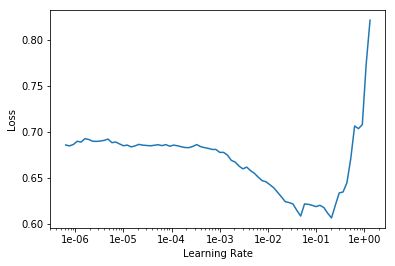

In [58]:
learn.recorder.plot()

In [59]:
lr = 1e-2

In [60]:
learn.fit_one_cycle(1, lr, moms=(0.8, 0.7))

Total time: 00:27
epoch  train_loss  valid_loss  accuracy
1      0.551143    0.460867    0.805000  (00:27)



In [61]:
learn.save('first')

In [62]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

Total time: 00:32
epoch  train_loss  valid_loss  accuracy
1      0.489577    0.369715    0.847500  (00:32)



In [63]:
learn.save('second')

In [64]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

Total time: 00:44
epoch  train_loss  valid_loss  accuracy
1      0.393767    0.257797    0.905000  (00:44)



In [65]:
learn.save('third')

In [66]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

Total time: 01:47
epoch  train_loss  valid_loss  accuracy
1      0.327039    0.254392    0.900000  (00:53)
2      0.313264    0.250191    0.887500  (00:53)



In [67]:
learn.save('final')

In [69]:
learn.fit_one_cycle(4, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

Total time: 03:34
epoch  train_loss  valid_loss  accuracy
1      0.297355    0.256763    0.882500  (00:53)
2      0.305369    0.221603    0.910000  (00:53)
3      0.280774    0.232907    0.892500  (00:53)
4      0.269057    0.211715    0.905000  (00:53)



In [70]:
learn.save('final_plus_4')